# Simulation of standard Snakes and ladders Game
## This program is used to simulate snakes and ladder game to find the average length of the game
** Author: Edwin Ismail **

In [1]:
import random
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# initializing size of the dance
dice = 6


*** snakes and ladders for the game for a snake element [[0]] < element [[1]] and for a ladder element [[0]] < element [[1]] ***

In [2]:
snakes_ladders = [[1, 38], [4, 14], [9, 31], [21, 42], [28, 84], [36, 44], [51, 67], [71, 91], [80, 100], [16, 6], [47, 26], [49, 11], [56, 53], [62, 19],
                  [64, 60], [87, 24], [93, 73], [95, 75], [98, 78]]
#only laddder
#snakes_ladders= [[1, 38], [4, 14], [9, 31], [21, 42], [28, 84], [36, 44], [51, 67], [71, 91], [80, 100]]
#only snakes            
#snakes_ladders=[ [16, 6], [47, 26], [49, 11], [56, 53], [62, 19],[64, 60], [87, 24], [93, 73], [95, 75], [98, 78]]

*** random snake and ladder generator ***


In [3]:
def RandomSnake(numSnake, numLadder):
    randomSnake = []
    countSnake = 0
    countLadder = 0
    s_l_set = set()
    s_l_set.update([])
    while len(randomSnake) < (numSnake+numLadder) :
        x = random.randint(1, 100)
        y = random.randint(1, 100)
        if y > x and countSnake < (numSnake) and y != 100:
            if not y in s_l_set and  not x in s_l_set:
                randomSnake.append([y, x])
                countSnake += 1
        if y < x and countLadder < (numLadder):
            if not y in s_l_set and not x in s_l_set:
                randomSnake.append([y, x])
                countLadder += 1
        for ele in randomSnake:
            s_l_set.update(ele)
    # just verifying if snakes and ladders are unique
    """df=pd.DataFrame(list(s_l_set),columns=['just'])
    print(df['just'].value_counts())"""
    return randomSnake

*** Function for the simulation of the game snakes and ladders ***


In [4]:
def gamesimulation(sl, dice):
    # initialization of parameters count for counting the length of game, path records the step of the game to  completion, token is actual element moving through the game
    count = 0
    path = []
    token = 0
    while token < 100:
        roll = random.randint(1, dice)
        token = token+roll
        count += 1
        if token > 100:
            token = token-roll
        for trans in sl:
            if token == trans[0]:
                token = trans[1]
                break
        path.append(token)
    return [count, path]

*** Function for commanding how many times the game should be played ***


In [5]:
def NumberOfGame(number,snakes):
    countlist = []
    for num in range(0, number):
        countlist.append(gamesimulation(snakes, dice))
    return countlist

*** Function is to presenting the result of the game ***

In [6]:
def results(countlist):
    print("The minimum lenght of the game is {} \n the shortest path is {}".format(
        (min(countlist))[0], (min(countlist))[1]))
    print("The maximum lenght of the game is {} \n the longest path is {}".format(
        (max(countlist))[0], (max(countlist))[1]))
    sums = 0
    for ele in countlist:
        sums += ele[0]
    print("Average length of the game is {}".format(sums/len(countlist)))
    return countlist

In [7]:
def average(countlist):
    sums = 0
    for ele in countlist:
        sums += ele[0]
    return sums/len(countlist)

In [8]:
#playing 100000 games
countlist=results(NumberOfGame(100000,snakes_ladders))

The minimum lenght of the game is 7 
 the shortest path is [14, 17, 22, 84, 89, 94, 100]
The maximum lenght of the game is 318 
 the longest path is [3, 6, 8, 13, 19, 20, 26, 31, 35, 44, 48, 50, 52, 53, 54, 57, 63, 68, 70, 72, 77, 82, 85, 86, 91, 75, 76, 79, 85, 88, 73, 75, 77, 83, 24, 30, 31, 44, 46, 67, 68, 72, 77, 81, 82, 24, 30, 34, 37, 41, 45, 48, 52, 58, 63, 66, 69, 74, 75, 79, 82, 24, 25, 31, 35, 37, 43, 11, 6, 10, 15, 20, 24, 25, 29, 34, 38, 41, 42, 43, 44, 11, 13, 19, 23, 24, 30, 34, 37, 40, 44, 26, 29, 33, 38, 44, 48, 52, 54, 60, 60, 61, 66, 67, 91, 92, 78, 84, 85, 88, 91, 94, 97, 78, 79, 82, 84, 89, 73, 78, 81, 83, 88, 73, 76, 81, 82, 85, 89, 90, 75, 79, 85, 24, 27, 33, 37, 42, 48, 52, 54, 60, 61, 19, 20, 25, 26, 32, 35, 44, 50, 52, 55, 59, 65, 91, 75, 77, 83, 84, 85, 24, 25, 29, 33, 37, 38, 41, 26, 27, 30, 44, 11, 15, 42, 26, 30, 34, 39, 41, 43, 26, 27, 30, 33, 44, 11, 17, 22, 25, 31, 33, 34, 37, 42, 46, 26, 27, 33, 34, 44, 45, 26, 29, 31, 44, 11, 15, 20, 23, 26, 30, 32, 38

*** converting a list to numpy array for ease graph plotting ***

In [9]:
countList=np.array(countlist)

In [10]:
#reshaping array to the shape (100000,)
countList=countList[:,:-1].reshape(100000,)

(0, 318)

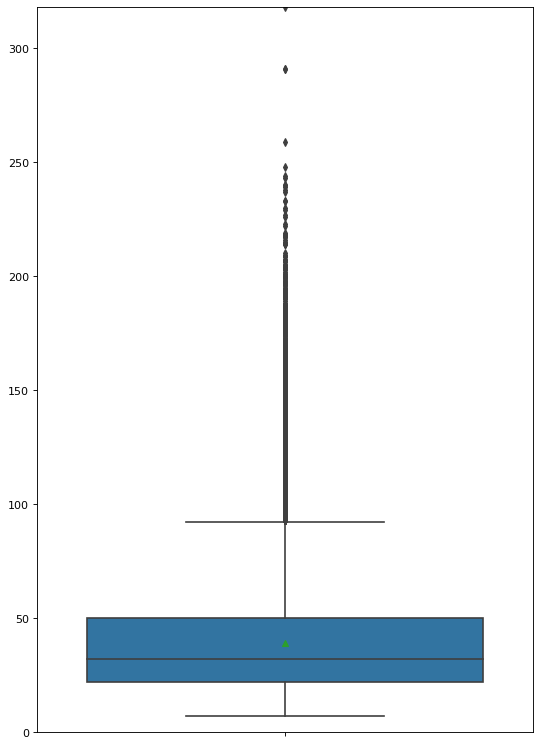

In [11]:
#plotbox 
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(countList,orient="v",showmeans=True)
plt.ylim(0,(max(countlist))[0])

Text(0.5, 1.0, 'Simulated Lengths of Chutes & Ladders Games')

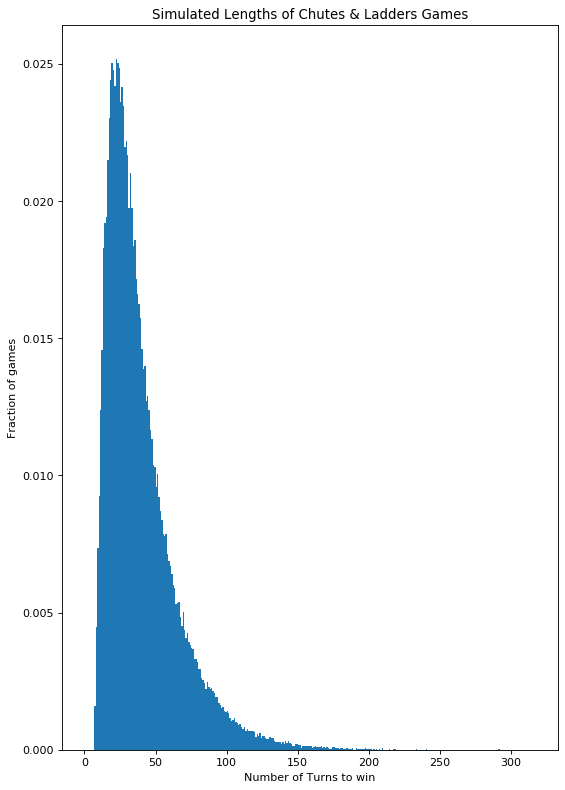

In [12]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range((max(countlist))[0]),density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Chutes & Ladders Games')

In [13]:
df=pd.DataFrame(data=countList,columns=["number of turns"])
df["number of turns"].value_counts()

22     2515
23     2503
19     2502
24     2484
20     2477
       ... 
216       1
215       1
210       1
206       1
318       1
Name: number of turns, Length: 226, dtype: int64

In [14]:
result=[]
for i in range(0,100000):
    result.append(RandomSnake(10,9))

In [15]:
result=np.array(result)
result=result.reshape(3800000)
result


array([96, 50, 46, ...,  9, 51, 28])

*** shows distribution of random snake and ladder

Text(0.5, 1.0, 'distribution of the random snake and ladders')

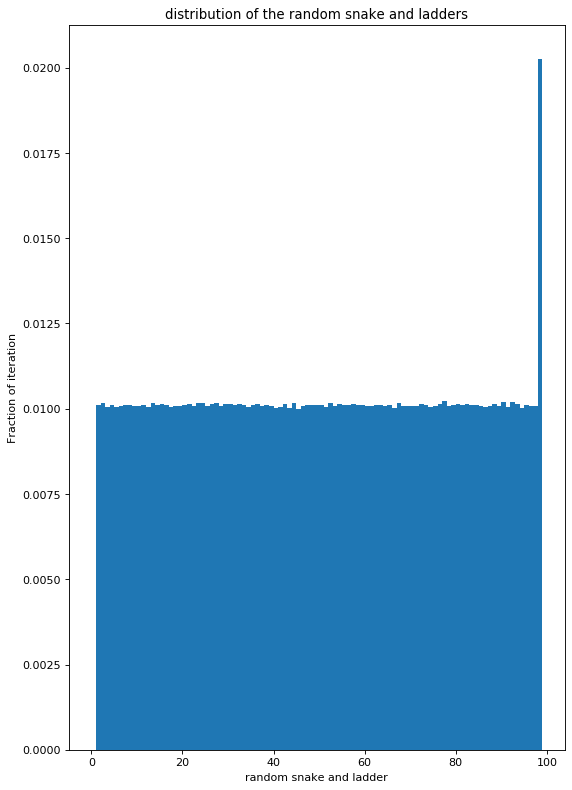

In [16]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(result,bins=range((max(result))),density=True)
plt.xlabel('random snake and ladder')
plt.ylabel('Fraction of iteration')
plt.title('distribution of the random snake and ladders')

In [17]:
countlist = results(NumberOfGame(100000,RandomSnake(10,9)))

The minimum lenght of the game is 2 
 the shortest path is [99, 100]
The maximum lenght of the game is 295 
 the longest path is [6, 10, 16, 19, 45, 50, 52, 55, 59, 64, 68, 70, 39, 81, 82, 86, 87, 47, 50, 56, 10, 12, 13, 17, 23, 29, 34, 35, 40, 42, 81, 83, 89, 47, 48, 49, 53, 56, 58, 60, 63, 30, 33, 39, 41, 81, 87, 41, 42, 48, 53, 58, 59, 61, 62, 63, 69, 74, 75, 81, 82, 86, 87, 91, 47, 48, 52, 56, 60, 65, 69, 74, 75, 80, 85, 91, 33, 36, 38, 81, 87, 41, 43, 48, 51, 56, 58, 59, 63, 70, 73, 76, 81, 84, 85, 89, 33, 37, 39, 81, 87, 33, 37, 40, 45, 50, 54, 60, 64, 65, 39, 45, 83, 84, 87, 33, 35, 41, 43, 48, 52, 55, 59, 62, 63, 70, 75, 78, 79, 82, 86, 41, 81, 87, 41, 83, 88, 33, 37, 39, 45, 47, 50, 52, 56, 61, 64, 69, 39, 43, 49, 52, 58, 61, 63, 30, 36, 38, 42, 48, 51, 55, 59, 60, 70, 39, 40, 81, 85, 89, 33, 35, 41, 47, 53, 56, 61, 64, 65, 68, 39, 41, 47, 51, 52, 56, 62, 30, 31, 35, 37, 40, 43, 83, 86, 47, 49, 50, 51, 52, 58, 59, 60, 63, 30, 15, 74, 78, 80, 85, 91, 33, 35, 37, 39, 43, 47, 52,

In [18]:
countList=np.array(countlist)
countList=countList[:,:-1].reshape(100000,)

*** plot box ***

(0, 295)

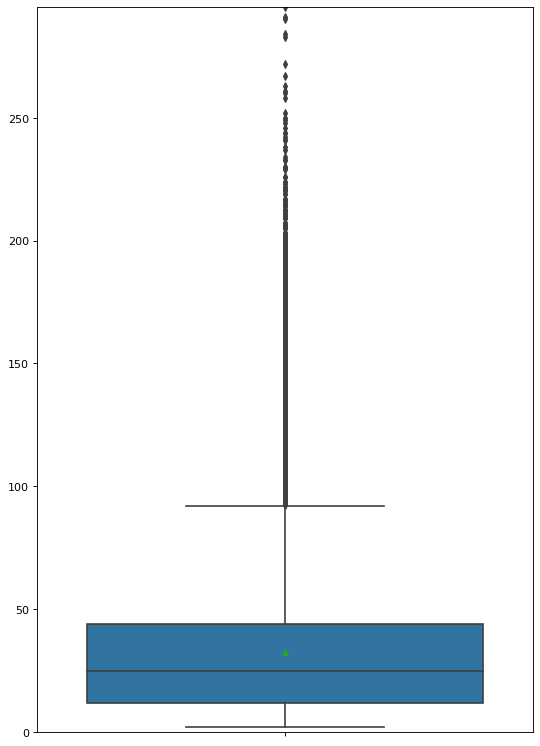

In [19]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(countList,orient="v",showmeans=True)
plt.ylim(0,(max(countlist))[0])

*** distribution of length of the game against franction of the game ***

Text(0.5, 1.0, 'Simulated Lengths of Chutes & Ladders Games')

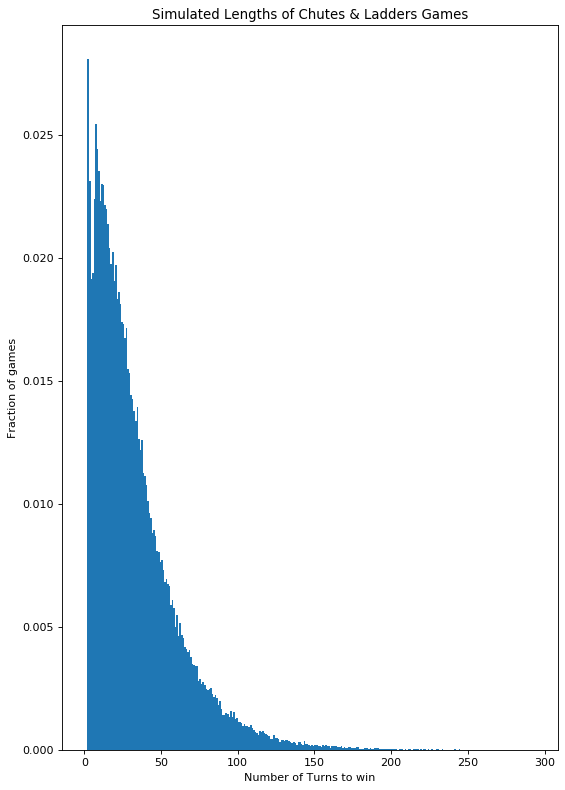

In [20]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range((max(countlist))[0]),density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Chutes & Ladders Games')

In [21]:
acc=[]
for i in range(0,1000):
    acc.append(average(NumberOfGame(100000,RandomSnake(10,9))))

In [22]:
avg=np.array(acc)

(0, 427.91856)

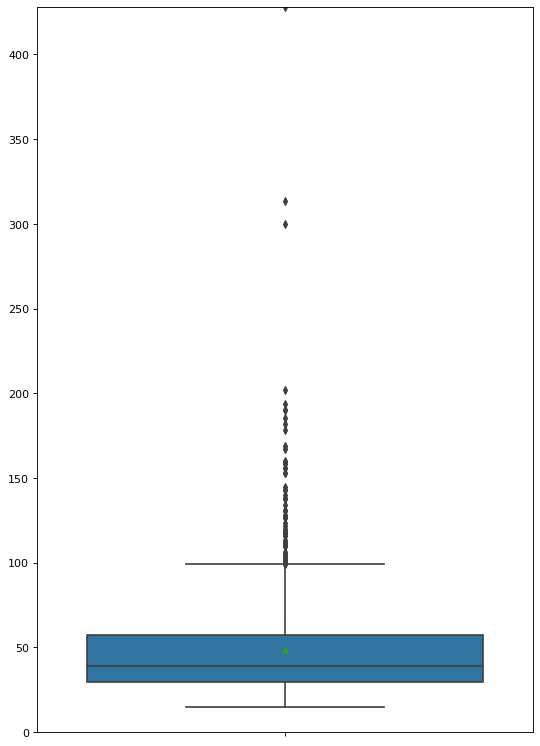

In [23]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
ax = sns.boxplot(avg,orient="v",showmeans=True)
plt.ylim(0,(max(avg)))

Text(0.5, 1.0, 'Simulated average length of the game snakes and ladders with random snake and ladder')

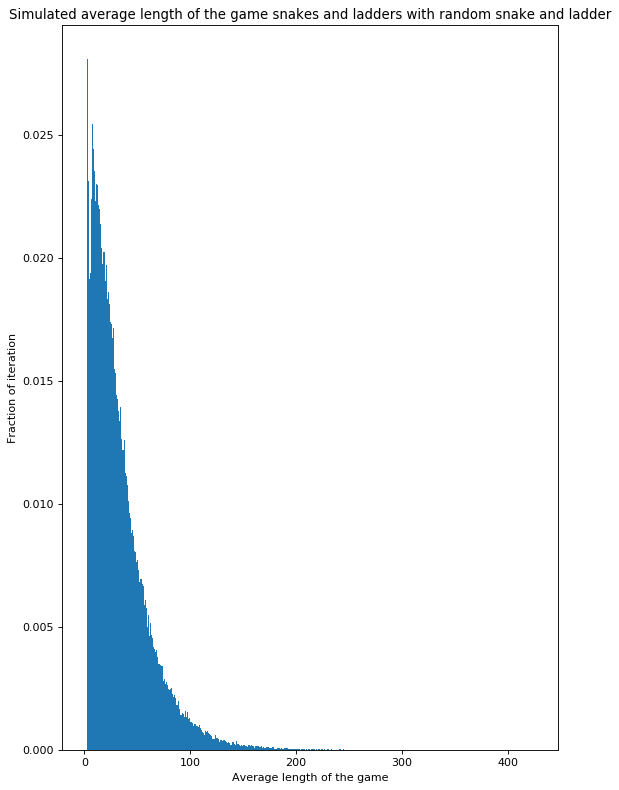

In [24]:
figure(num=None, figsize=(8, 12), dpi=80, facecolor='w', edgecolor='k')
plt.hist(countList,bins=range(int((max(avg)))),density=True)
plt.xlabel('Average length of the game')
plt.ylabel('Fraction of iteration')
plt.title('Simulated average length of the game snakes and ladders with random snake and ladder')

In [25]:
avg

array([ 87.98383,  30.74994,  65.6634 ,  37.80704,  48.37778,  63.25696,
        33.65423,  37.29617,  58.96215,  40.8168 ,  23.63013,  28.4205 ,
        31.09241,  31.60437,  51.7195 ,  42.21964,  60.16917,  30.35471,
        35.59447,  62.08132,  29.88322,  29.90944,  78.74389,  44.34003,
        28.5471 ,  27.5417 ,  51.14723,  43.69293,  43.94915,  59.09342,
        33.6184 ,  21.04624, 126.96734,  35.32955,  26.25152,  24.55248,
        60.62853,  32.20283,  39.16568,  51.33558,  67.62707,  37.90072,
        29.20622,  67.99126,  25.01712,  43.03365,  51.26485,  33.01501,
        24.60928,  30.80371,  31.70698,  21.91722,  27.96483,  22.69781,
        35.88502,  49.80765,  56.98658, 117.06478,  35.53138,  53.88749,
        28.05178,  71.91419,  35.32164,  33.6232 ,  29.92082,  52.50454,
        35.32246, 178.19531,  54.68738,  44.96625,  21.30941,  40.7247 ,
       167.31296, 118.7019 ,  37.76887,  51.53702,  52.79946,  46.82775,
        32.69818,  32.06338,  40.55494,  29.37295, 

*** saving average of average length of random snake and ladder ***

In [26]:
import pickle
with open('avg_avg', 'wb') as fp:
    pickle.dump(acc, fp)